In [1]:
import collections
import math
from matplotlib import patches
import matplotlib.pyplot as plt
import networkx as nx
from pprint import pprint

In [2]:
plt.rcParams["figure.figsize"] = [12., 6.]

In [3]:
g = nx.read_edgelist('../network/edge_list.txt', 
                     create_using=nx.DiGraph(), nodetype=int, data=False)

# Nodes, edges and selfloops

In [4]:
print 'Number of nodes: ' + str(g.number_of_nodes())
print 'Number of edges: ' + str(g.number_of_edges())
print 'Number of selfloops: ' + str(g.number_of_selfloops())

Number of nodes: 62107
Number of edges: 1608204
Number of selfloops: 1


In [5]:
g.is_directed()

True

# In-degree distribution

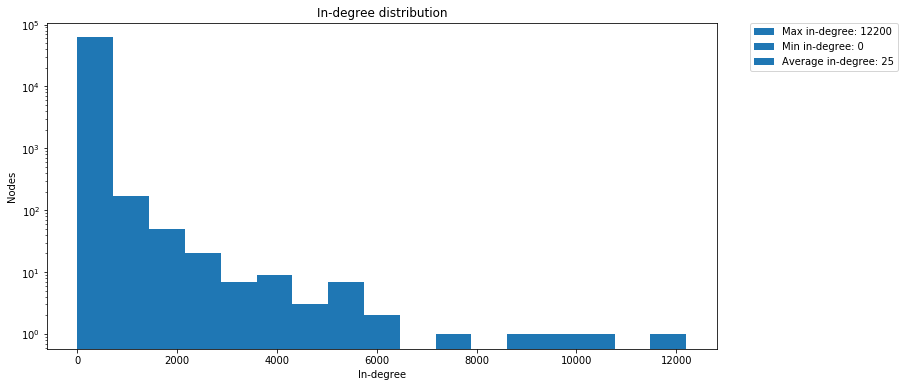

In [6]:
in_degrees = sorted(dict(g.in_degree()).values())
ideal_bins = math.ceil(math.log(len(in_degrees), 2)) + 1
patch = [patches.Patch(label='Max in-degree: ' + str(max(in_degrees))),
         patches.Patch(label='Min in-degree: ' + str(min(in_degrees))),
         patches.Patch(label='Average in-degree: ' + str(sum(in_degrees)/len(in_degrees)))]

plt.hist(in_degrees, bins=int(ideal_bins), log=True)
plt.title('In-degree distribution')
plt.xlabel('In-degree')
plt.ylabel('Nodes')
plt.legend(handles=patch, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Out-degree distribution

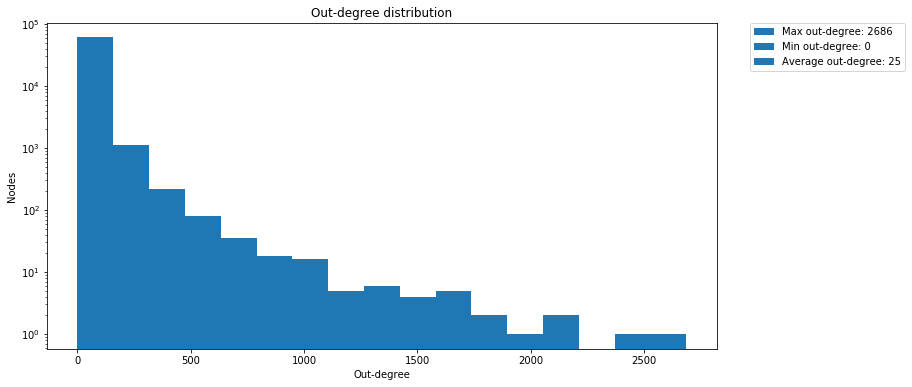

In [7]:
out_degrees = sorted(dict(g.out_degree()).values())
ideal_bins = math.ceil(math.log(len(out_degrees), 2)) + 1
patch = [patches.Patch(label='Max out-degree: ' + str(max(out_degrees))),
         patches.Patch(label='Min out-degree: ' + str(min(out_degrees))),
         patches.Patch(label='Average out-degree: ' + str(sum(out_degrees)/len(out_degrees)))]

plt.hist(out_degrees, bins=int(ideal_bins), log=True)
plt.title('Out-degree distribution')
plt.xlabel('Out-degree')
plt.ylabel('Nodes')
plt.legend(handles=patch, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Degree distribution

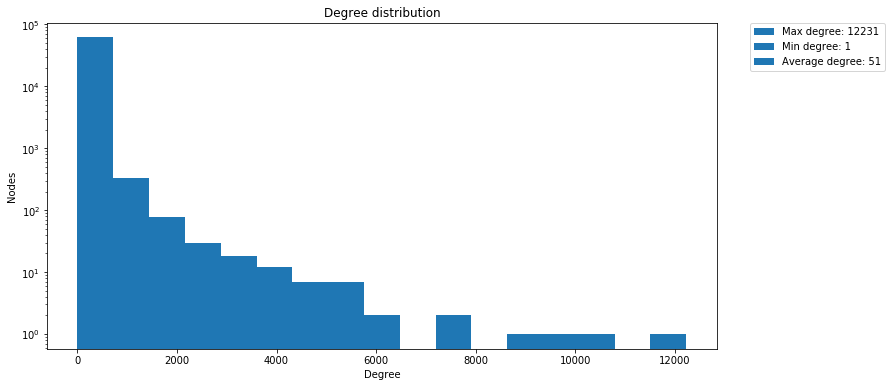

In [8]:
degrees = sorted(dict(g.degree()).values())
ideal_bins = math.ceil(math.log(len(out_degrees), 2)) + 1
patch = [patches.Patch(label='Max degree: ' + str(max(degrees))),
         patches.Patch(label='Min degree: ' + str(min(degrees))),
         patches.Patch(label='Average degree: ' + str(sum(degrees)/len(degrees)))]

plt.hist(degrees, bins=int(ideal_bins), log=True)
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.legend(handles=patch, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Connectivity

The Graph is neither strongly connected nor weakly connected


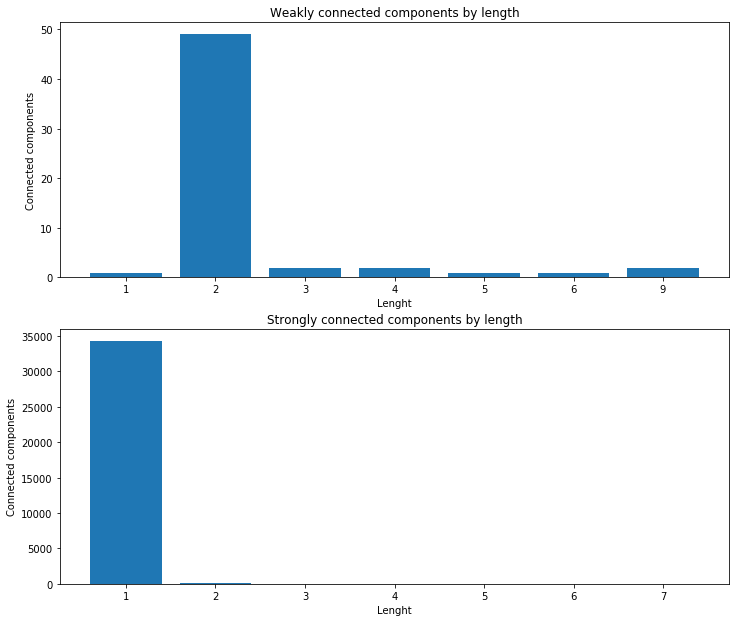

In [9]:
if nx.is_strongly_connected(g):
    print 'The Graph is strongly connected with ' + \
        str(nx.number_strongly_connected_components(g)) + ' strongly ' \
        'connected components'
elif nx.is_weakly_connected(g):
    print 'The Graph is weakly connected with ' + \
        str(nx.number_weakly_connected_components(g)) + ' weakly connected' \
        ' components'
else:
    print 'The Graph is neither strongly connected nor weakly connected'

weakcon_components = nx.weakly_connected_components(g)
strongcon_components = nx.strongly_connected_components(g)
weakcon_components = [len(c) for c in sorted(weakcon_components, key=len, 
                                             reverse=True)]
strongcon_components = [len(c) for c in sorted(strongcon_components, key=len,
                                              reverse=True)]
c_weak = collections.Counter()
c_strong = collections.Counter()

for con in weakcon_components:
    c_weak.update(str(con))

for con in strongcon_components:
    c_strong.update(str(con))

c_weak = dict(c_weak)
c_strong = dict(c_strong)

plt.subplot(211)
plt.bar(range(0, len(c_weak.values())), [c_weak[k] for k in sorted(c_weak)])
plt.xticks(range(0, len(c_weak.values())), sorted(c_weak.keys()))
plt.title('Weakly connected components by length')
plt.xlabel('Lenght')
plt.ylabel('Connected components')
plt.subplot(212)
plt.title('Strongly connected components by length')
plt.bar(range(0, len(c_strong.values())), [c_strong[k] for k in sorted(c_strong)])
plt.xticks(range(0, len(c_strong.values())), sorted(c_strong.keys()))
plt.xlabel('Lenght')
plt.ylabel('Connected components')
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=1.4, wspace=0.2,
                   hspace=0.2)
plt.show()

# Density

In [10]:
print "The Graph's density is " + str(nx.density(g))

The Graph's density is 0.000416933726417


# Closeness centrality

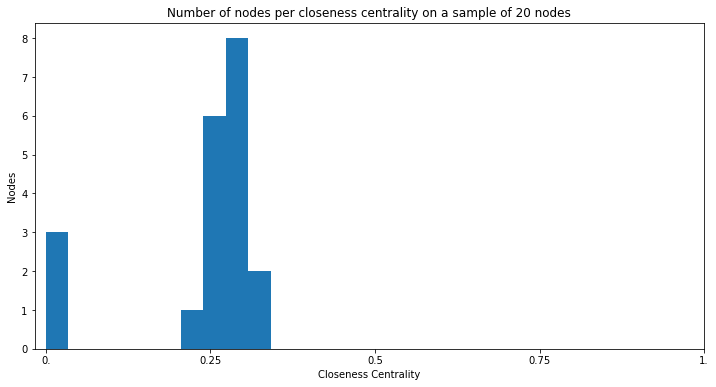

In [11]:
to_check = 20
nodes = g.node.items()[0:to_check]
clos_cent = list()

for node in nodes:
    clos_cent.append(nx.closeness_centrality(g, node[0]))

clos_cent = sorted(clos_cent)

plt.hist(clos_cent)
plt.title('Number of nodes per closeness centrality on a sample of ' \
          + str(to_check) + ' nodes')
plt.xticks([0., 0.25, 0.5, 0.75, 1.], ['0.', '0.25', '0.5', '0.75', '1.'])
plt.xlabel('Closeness Centrality')
plt.ylabel('Nodes')
plt.show()

# Betweenness Centrality

In [ ]:
k = 100
bet_cent = sorted(nx.betweenness_centrality(g, k=k).values())

plt.hist(bet_cent)
plt.title('Number of nodes per betweenness centrality on a sample of ' \
          + str(k) + ' nodes')
plt.xticks([0., 0.25, 0.5, 0.75, 1.], ['0.', '0.25', '0.5', '0.75', '1.'])
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nodes')
plt.show()

# Neighbors

In [ ]:
num_of_nei = collections.Counter()

for node in g.nodes:
    num_of_nei.update(str(len(list(g.neighbors(node)))))

plt.bar([k for k in sorted(num_of_nei.keys())],
       [num_of_nei[k] for k in sorted(num_of_nei.keys())])
plt.title('Number of neighbors per nodes')
plt.xticks([int(k) for k in sorted(num_of_nei.keys())], 
           [k for k in sorted(num_of_nei.keys())])
plt.xlabel('Neighbors')
plt.ylabel('Nodes')
plt.show()

# Degree distribution 2

In [ ]:
hist = nx.degree_histogram(g)

plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Nodes")
plt.loglog()
plt.show()